Module 6 <br>
Laurie Stevens & Guillaume Palumbo <br>
Année 2016-2017

CHALLENGE 1.1 <br>
"Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above." <br>
Commençons tout d'abord par importer les librairies nécéssaires.

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

EXPONENTIELLE <br>
Testons en premier la version implémentée dans le module.

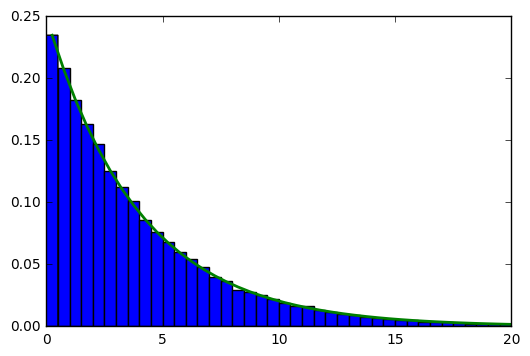

In [2]:
alpha = 0.25 # rate of the exponential distribution
x = np.random.random_sample(100000)
y = -1/alpha*np.log(1-x)


# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=np.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*np.exp(-alpha*xc), lw=2)


Regardons maintenant la fonction intégrée de numpy.

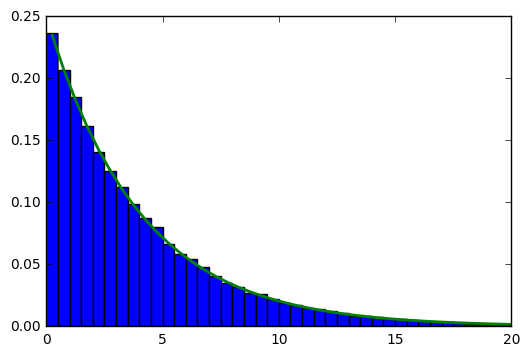

In [3]:
y = np.random.exponential(1/alpha,100000)

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=np.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*np.exp(-alpha*xc), lw=2)


Les deux implémentations donnent un résultat satisfaisant, comparé à l'exponentielle dessinée en vert.

GAUSSIENNE <br>
Testons la première des deux implémentations qui nous sont données.

Size of accepted set h and expected size 1/K: 71412 71428.57142857143


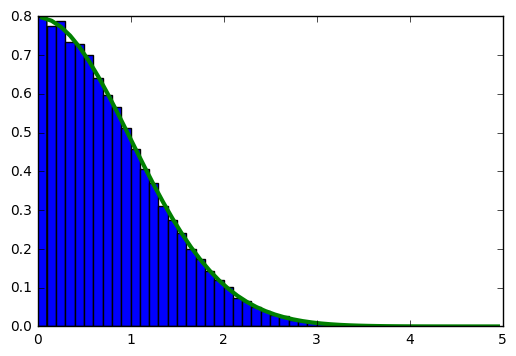

In [4]:
# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(N):
    u1 = np.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = np.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = np.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*np.exp(-g**2/2.0)/np.sqrt(2*np.pi) / \
                (K*np.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

# Plots
binwidth=0.1
bins=np.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=np.arange(0.,5., binwidth),normed=True,color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')

Testons ensuite la deuxième implémentations données.

Acceptance ratio: 0.71521


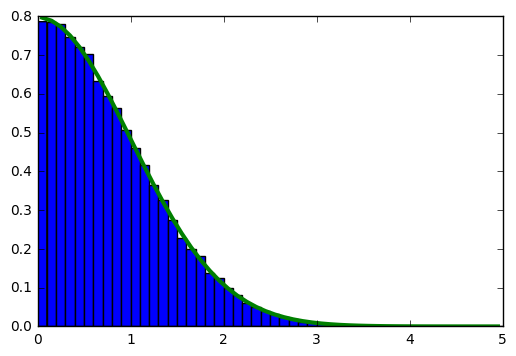

In [5]:
# Distribute g according to the exponential distribution
uniform1 = np.random.random_sample(N)
g = np.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = np.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*np.exp(-g**2/2.0)/np.sqrt(2*np.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = np.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = np.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
binwidth=0.1
bins=np.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')

Regardons maintenant la fonction intégrée de numpy.

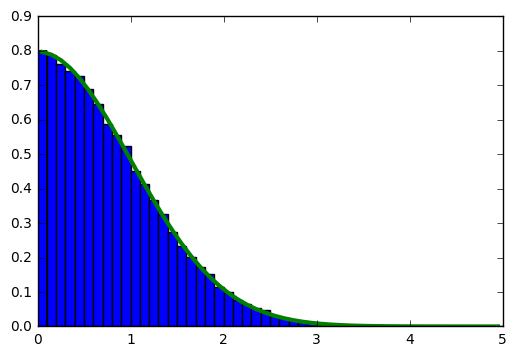

In [6]:
h=np.random.normal(0.0,1.0,N)

# Plots
binwidth=0.1
bins=np.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')

A nouveau, les trois implémentations donnent un résultat satisfaisant par rapport à la fonction gaussienne dessinée en vert.

CHALLENGE 1.2 <br>
"Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected."

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


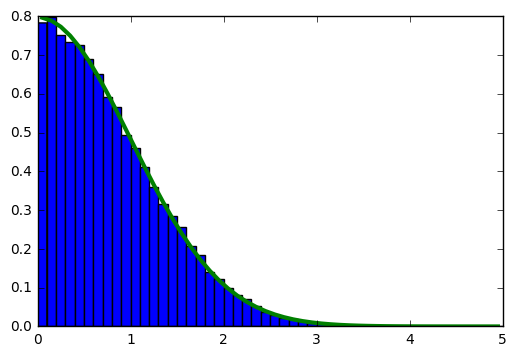

In [7]:
A=np.random.random_sample(100000.0/2.0)
B=np.random.random_sample(100000.0/2.0)

W=np.sqrt(-2.0*np.log(A))*np.cos(2.0*np.pi*B)
Z=np.sqrt(-2.0*np.log(B))*np.sin(2.0*np.pi*A)

h=np.append(W,Z)

# Plots
binwidth=0.1
bins=np.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')

On peut de nouveau voir que le résultat est satisfaisant.

CHALLENGE 2.1 <br>
Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

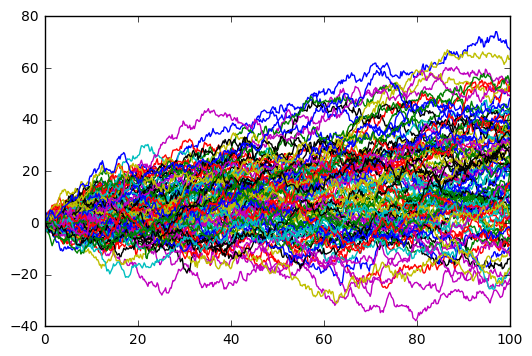

In [8]:
T=100.0
nt=500
dt=T/nt
alpha=2.0
c=0.20
npart=100000

# We set mu=0
sigma = 1.0
x0 = np.random.normal(loc=0,scale=sigma,size=npart)

t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart) + c*dt

for i in range(100):
    pyplot.plot(t,x[:,i])


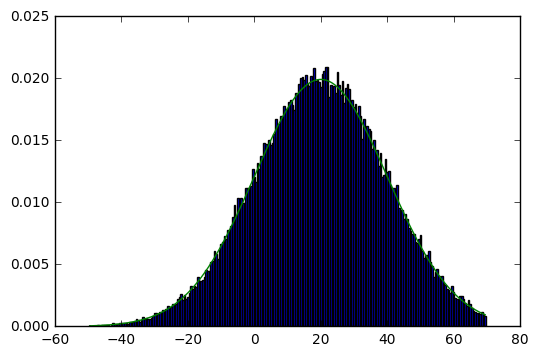

In [9]:
# Generate bins centered around 0
binwidth=0.5
bins=np.arange(-50,70,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1] + binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+sigma**2

pyplot.plot(bin_centers, np.exp((-(bin_centers-(c*T))**2)/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))

On voit que la distribution après un temps T donne toujours une Gaussienne. La moyenne de celle-ci est cependant décalée de cT, ce qui paraît cohérent étant donné qu'à chaque étape, le système reçoit une contribution systématique cdt.

CHALLENGE 2.2 <br>
- Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!

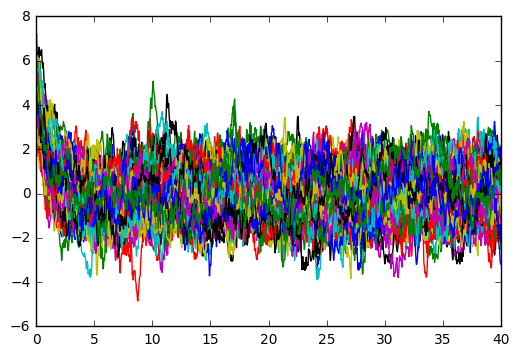

In [10]:
T=40.0
nt=1000
dt=T/nt
alpha=1.0
gamma=1.0
npart=1000

# We set mu=0
sigma = 1.0
x0 = np.random.normal(loc=5,scale=sigma,size=npart)

t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]= x[i] + np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart) - gamma*x[i]*dt

for i in range(100):
    pyplot.plot(t,x[:,i])

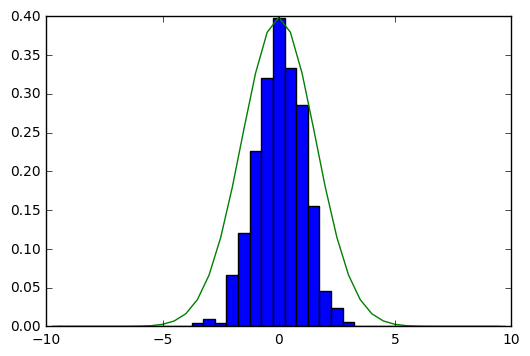

In [11]:
# Generate bins centered around 0
binwidth=0.5
bins=np.arange(-10,10,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1] + binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2 = alpha/gamma

pyplot.plot(bin_centers, np.exp((-(bin_centers**2)/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))/np.sqrt(2*np.pi))

On peut observer que, en partant d'un point éloigné du point d'équilibre (0), le système arrive à un état d'équilibre après quelques secondes, en suivant un comportement exponentiel. <br>
La distribution après un temps T est toujours une Gaussienne, si ce n'est que sa variance est devenue $\frac{\alpha}{\gamma}$. <br>
N'ayant pas compris par nous même comment trouver cette nouvelle valeur de la variance, et souhaitant quand même vérifier si le résultat était correct, nous avons demandé l'aide d'un autre binôme (Pawel Krynski & Colin Sterckx). Ils nous ont expliqué qu'ils avaient récupéré les valeurs du plateau pour en extraire une variance, et qu'ils avaient fait un graphique de cette variance en fonction d'abord de $\alpha$ et ensuite de $\gamma$. Ils ont ensuite remarqué que le comportement de cette variance était proportionnelle à $\alpha$ et inversément proportionnelle à $\gamma$. <br>
Cette méthode nous paraît très cohérente et la variance obtenue fonctionne plutôt bien par rapport à la gaussienne obtenue.

CHALLENGE 3.1 <br>
"Check that this is not a coincidence and that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations." <br>
Définissons d'abord toutes les fonctions nécéssaires.

In [12]:
nx=10
ny=10
alpha=0.1

In [13]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = np.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [14]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

  
    return energy

In [15]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (np.random.random_sample()<np.exp(-(energy_if_site_flipped-energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [16]:
j=0
for k in range (0,10):
    sp=initial_state(nx,ny)

    NMC = 100000
    states = np.empty(NMC+1)
    states[0]=sp[5,5]
    
    sigma=sp[5,5]
    energy_before_flip = energy_at_site(sp,alpha,sigma,5,5)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,5,5)
    
    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,5,5)
        states[n]=sp[5,5]
        
    dE=np.abs(energy_before_flip - energy_if_site_flipped)
    
    ups = np.extract(states==1, states).size
    downs = NMC - ups
    
    ratio=(ups/downs)
    expected_ratio=np.exp(dE)
    expected_ratio2=np.exp(-dE)
    
    if ((ratio >= (expected_ratio - expected_ratio*0.05) and (ratio <= expected_ratio + expected_ratio*0.05)) or ((ratio >= expected_ratio2 - expected_ratio2*0.05) and (ratio <= expected_ratio2 + expected_ratio2*0.05))):
        j=j+1
print(j*10,'%')

100 %


On constate, après de nombreux tests en plus de celui-ci, que Metropolis donne le bon ratio dans 100% des cas.

CHALLENGE 3.2 <br>

- Perform a series of runs with $\alpha \in [0 1]$ and plot the average energy of the system and its magnetisation as a function of $\alpha$. Estimate the critical value of $\alpha$ at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?
- Redo the analysis with a different set of boundary conditions for the lattice and a different initial lattice configuration. For example, you could assume that on the borders all the spins are pointing upwards on the borders while they are randomly oriented in the bulk.

In [17]:
NMC=100

nx=100
ny=100

sp=np.ones([nx,ny])
final_states=np.zeros([10,NMC+1,nx,ny])

In [18]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = np.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

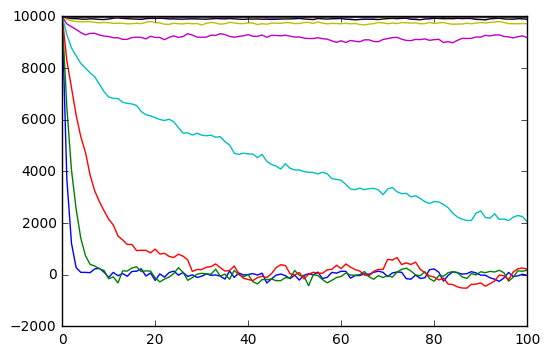

In [19]:
pyplot.figure()
for i in range (0,10):
    sp = np.ones([nx,ny])
    alpha = 0.1 + 0.1*i
    final_states[i]=ising_model_metropolis(sp, NMC, nx, ny, alpha)
    pyplot.plot(final_states[i].sum(axis=(1,2)),label=alpha)

On peut voir que c'est pour $\alpha=0.4$ (la courbe bleu turquoise) que le comportement de la magnétisation commence à changer.

In [20]:
def average_energy(sp,alpha,sigma,nx,ny):
    N_tot=nx*ny
    Energy_tot=0
    for i in range (0,nx):
        for j in range (0,ny):
            Energy_tot=Energy_tot+energy_at_site(sp,alpha,sigma[i,j],i,j)
    Avg_Energy=Energy_tot/N_tot
    return Avg_Energy

In [21]:
Avg_Energy=np.zeros(20)
alpha = np.zeros(20)
final_states=np.zeros([20,NMC+1,nx,ny])

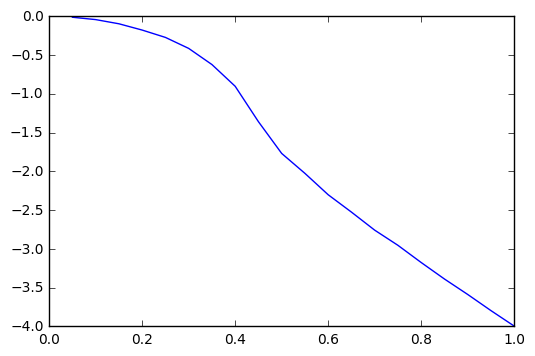

In [22]:
for i in range (0,20):
    sp = np.ones([nx,ny])
    alpha[i] = 0.05 + 0.05*i
    final_states[i]=ising_model_metropolis(sp, NMC, nx, ny, alpha[i])
    Avg_Energy[i]=average_energy(final_states[i,NMC],alpha[i],final_states[i,NMC],nx,ny)

    
pyplot.figure()
pyplot.plot(alpha,Avg_Energy)

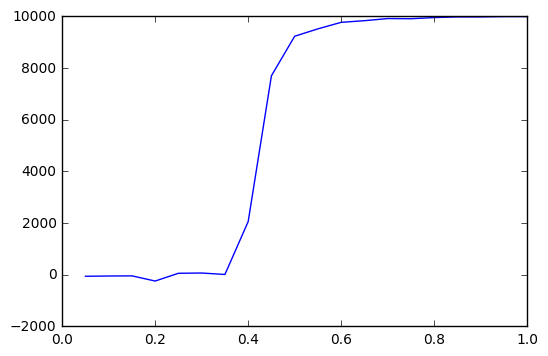

In [23]:
Magnet=np.zeros(20)
for k in range (0,20):
    for i in range (0,nx):
        for j in range (0,ny):
            Magnet[k] = Magnet[k] + final_states[k,NMC,i,j]

pyplot.figure()
pyplot.plot(alpha,Magnet)

On peut constater que le changement de phase se produit un peu après $\alpha=0.4$ pour l'énergie moyenne (premier graphique) ainsi que pour la magnétisation (deuxième graphique). La solution de Onsager étant de $\alpha=0.44$, notre valeur semble correcte.

In [24]:
def initial_state2(nx,ny):
    sp=np.ones([nx,ny])
    sp[1:-1,1:-1]=np.random.randint(0,2,(nx-2,ny-2))
    sp[sp==0] =-1
    
    return sp

In [25]:
Avg_Energy=np.zeros(20)
alpha = np.zeros(20)
final_states=np.zeros([20,NMC+1,nx,ny])

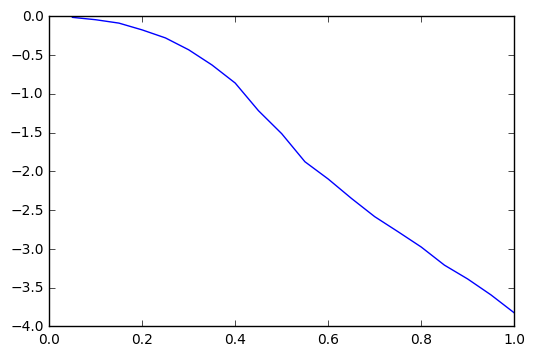

In [27]:
for i in range (0,20):
    sp = initial_state2(nx,ny)
    alpha[i] = 0.05 + 0.05*i
    final_states[i]=ising_model_metropolis(sp, NMC, nx, ny, alpha[i])
    Avg_Energy[i]=average_energy(final_states[i,NMC],alpha[i],final_states[i,NMC],nx,ny)

    
pyplot.figure()
pyplot.plot(alpha,Avg_Energy)

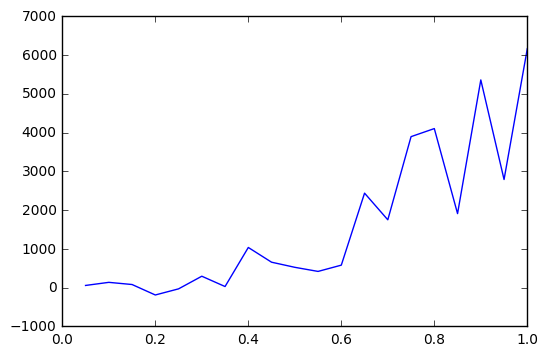

In [28]:
Magnet=np.zeros(20)
for k in range (0,20):
    for i in range (0,nx):
        for j in range (0,ny):
            Magnet[k] = Magnet[k] + final_states[k,NMC,i,j]

pyplot.figure()
pyplot.plot(alpha,Magnet)

Avec un autre état initial (spins positifs sur les bords et aléatoires au centre), le changement de phase est bien clair au niveau de l'énergie moyenne (premier graphique) et advient de nouveau un peu après $\alpha=0.4$. Il est moins bien défini pour la magnétization, même si on devine le début de l'augmentation (et donc du changement de phase) un peu après $\alpha=0.4$.